In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.shape

(200000, 9)

In [4]:
df.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [6]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

## 🧹 Handle Missing Data¶

In [7]:
df=df.drop(['Unnamed: 0', 'key'],axis=1)

In [8]:
df.shape

(200000, 7)

In [9]:
## now check null value of each column 
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [10]:
## now check total null value of total enire data set 
df.isnull().sum().sum()

2

In [11]:
## Handing misssing value
df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean(),inplace=True)
df['dropoff_longitude'].fillna(df['dropoff_longitude'].median(),inplace=True) 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15416\1457964954.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean(),inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15416\1457964954.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [12]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
# convert pickup_datetime  object data type to date data types
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'],errors='coerce',utc=True)

In [14]:
#now check data types again
df['pickup_datetime'].dtypes

datetime64[ns, UTC]

## 🛠️ Feature Engineerin

In [15]:
# now extrct hours,month ,day,year,day of week from 'pickup_datetime this column 

df['hour']=df['pickup_datetime'].dt.hour
df['day']=df['pickup_datetime'].dt.day
df['month']=df['pickup_datetime'].dt.month
df['year']=df['pickup_datetime'].dt.year
df['dayofweek']=df['pickup_datetime'].dt.dayofweek

In [16]:
df.head(3)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0


In [17]:
m=df['fare_amount'].value_counts()

print("max count", m[6.50])
m

max count 9684


fare_amount
6.50      9684
4.50      8247
8.50      7521
5.70      5858
5.30      5838
          ... 
140.25       1
190.00       1
45.16        1
28.20        1
89.10        1
Name: count, Length: 1244, dtype: int64

In [18]:
df=df.drop('pickup_datetime',axis=1)

In [19]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

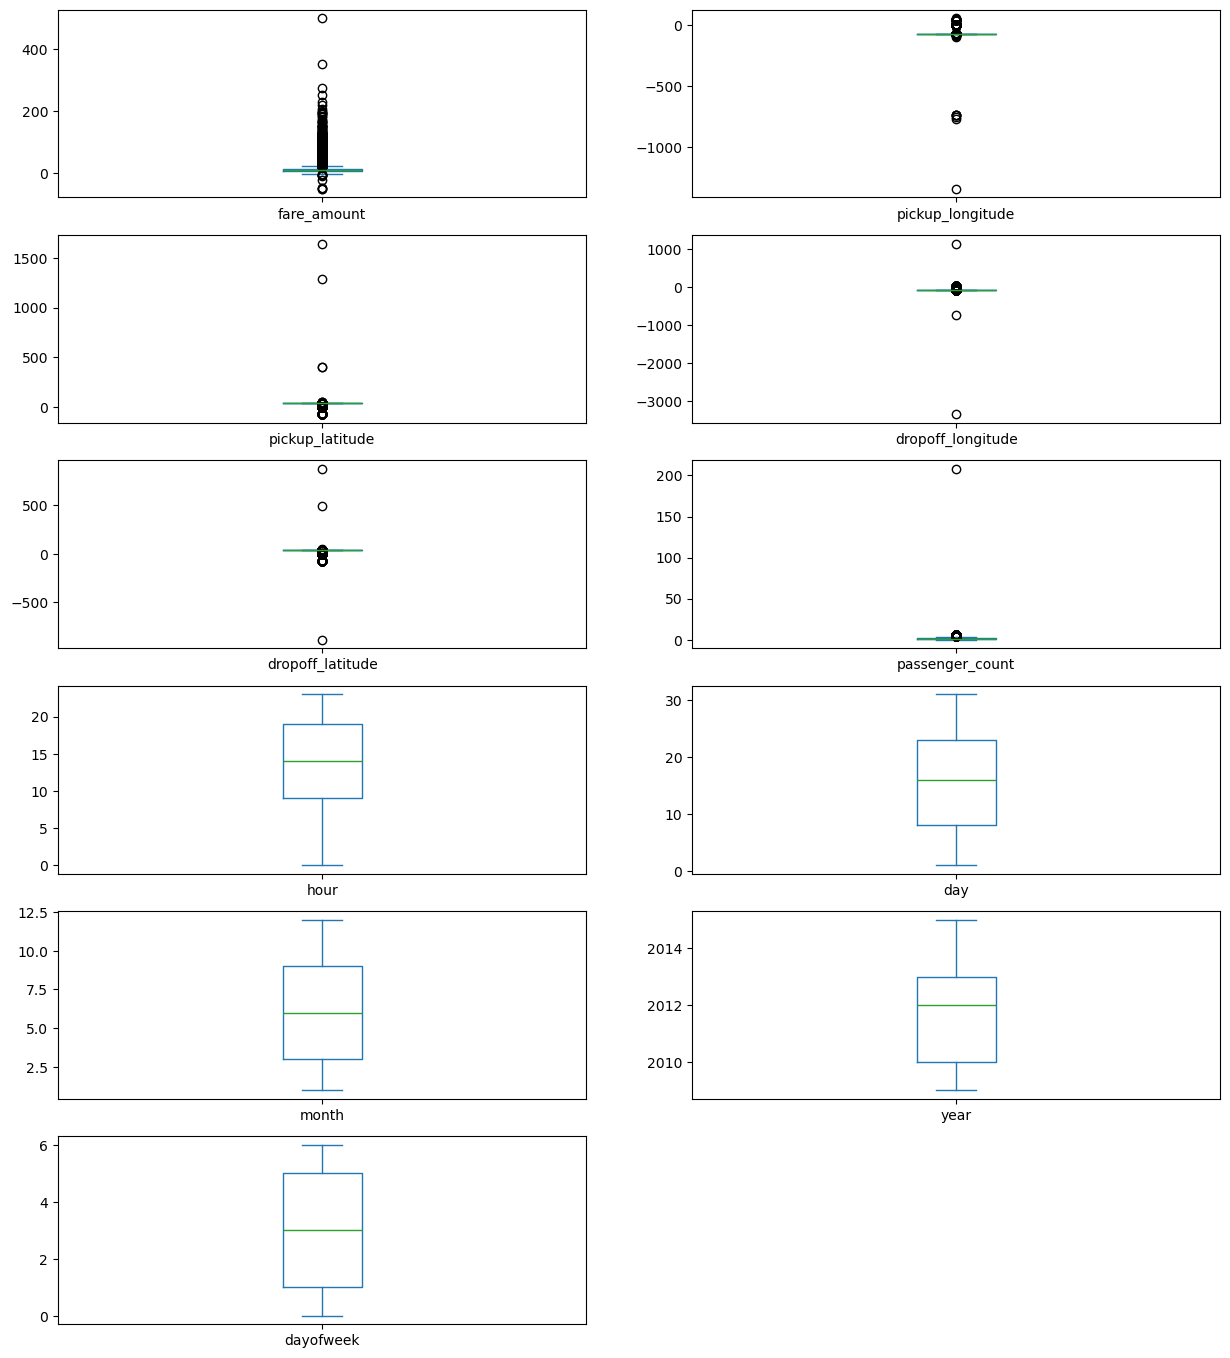

In [20]:
df.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,20))

In [21]:
# Function to remove outliers for a specific column using the IQR method
def remove_outlier(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q2 = df1[col].quantile(0.50)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    
    print("-------------------------------------------------------------")
    print(f"Column: {col}, Q1={Q1}, Q2={Q2}, Q3={Q3}")
    print("-------------------------------------------------------------")
    
    # Clipping values outside whiskers
    df1[col] = np.clip(df1[col], lower_whisker, upper_whisker)
    return df1

# Function to treat outliers for multiple columns
def treat_outliers_all(df1, col_list):
    print("Columns to treat:", col_list)
    for c in col_list:
        df1 = remove_outlier(df1, c)
    return df1

In [22]:
df=treat_outliers_all(df,df.columns)

Columns to treat: Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek'],
      dtype='object')
-------------------------------------------------------------
Column: fare_amount, Q1=6.0, Q2=8.5, Q3=12.5
-------------------------------------------------------------
-------------------------------------------------------------
Column: pickup_longitude, Q1=-73.992065, Q2=-73.98182299999999, Q3=-73.96715350000001
-------------------------------------------------------------
-------------------------------------------------------------
Column: pickup_latitude, Q1=40.73479575, Q2=40.752592, Q3=40.767158
-------------------------------------------------------------
-------------------------------------------------------------
Column: dropoff_longitude, Q1=-73.991407, Q2=-73.98009300000001, Q3=-73.96365875
-------------------------------------------------------------
---

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

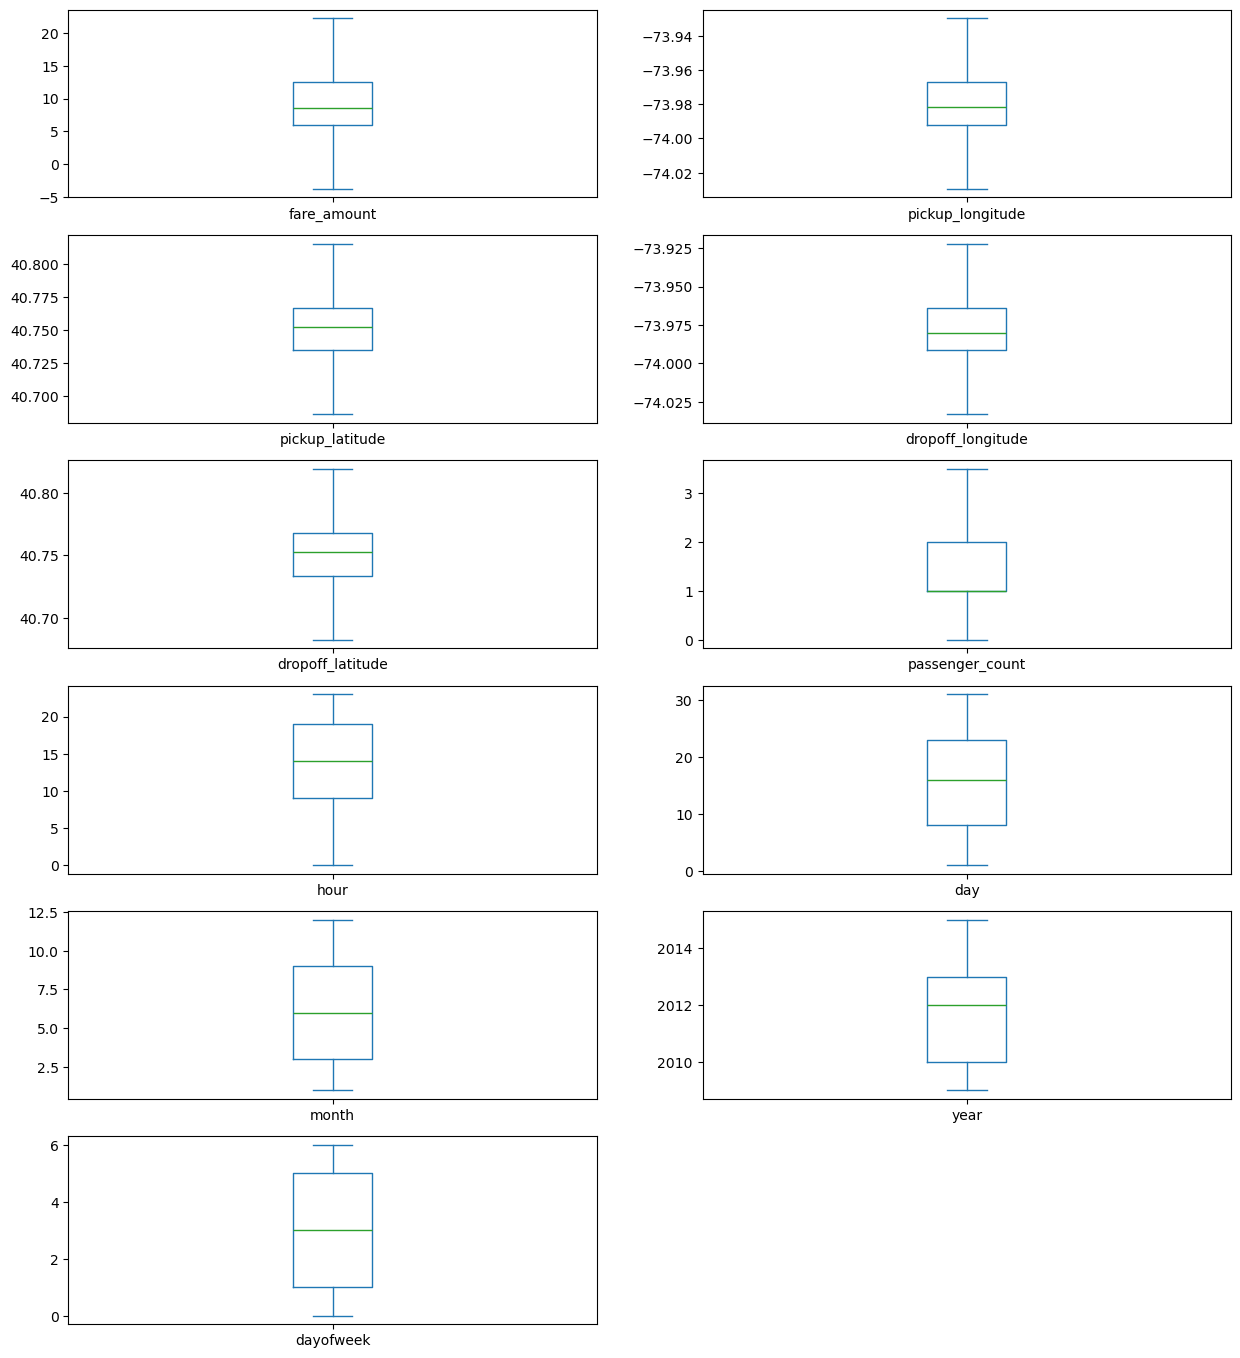

In [23]:
df.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,20))

In [24]:
df.shape

(200000, 11)

In [25]:
 incorrect_coordinates = df.loc[
    (df.pickup_latitude > 90) | (df.pickup_latitude < -90) |
    (df.dropoff_latitude > 90) | (df.dropoff_latitude < -90) |
    (df.pickup_longitude > 180) | (df.pickup_longitude < -180) |
    (df.dropoff_longitude > 180) | (df.dropoff_longitude < -180)
]

In [26]:
df.drop(incorrect_coordinates,inplace=True,errors='ignore')

In [27]:
! pip install haversine

In [28]:
import haversine as hs

travel_dist = [
    hs.haversine((lat1, lon1), (lat2, lon2))
    for lon1, lat1, lon2, lat2 in zip(
        df['pickup_longitude'],
        df['pickup_latitude'],
        df['dropoff_longitude'],
        df['dropoff_latitude']
    )
]

df['dist_travel_km'] = travel_dist


In [29]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088


In [30]:
## uber cant travel over 130 km and min 1 km so minimize it
df=df[(df.dist_travel_km >=1) & (df.dist_travel_km <=130)]

In [31]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.00,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088
...,...,...,...,...,...,...,...,...,...,...,...,...
199994,12.00,-73.983070,40.760770,-73.972972,40.754177,1.0,14,31,1,2014,4,1.122879
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,1,14,3,2014,4,1.875053
199997,22.25,-73.986017,40.756487,-73.922036,40.692588,2.0,0,29,6,2009,0,8.919323
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,14,20,5,2015,2,3.539720


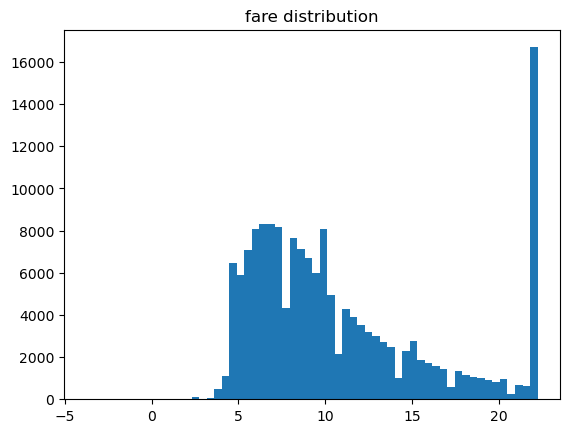

In [32]:
plt.hist(df['fare_amount'], bins=60); plt.title('fare distribution'); plt.show()

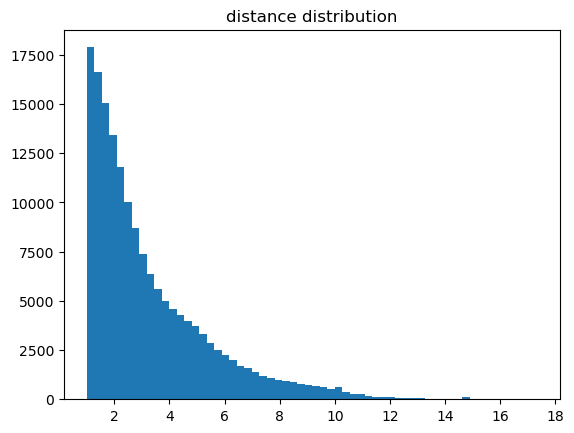

In [33]:
plt.hist(df['dist_travel_km'], bins=60); plt.title('distance distribution'); plt.show()

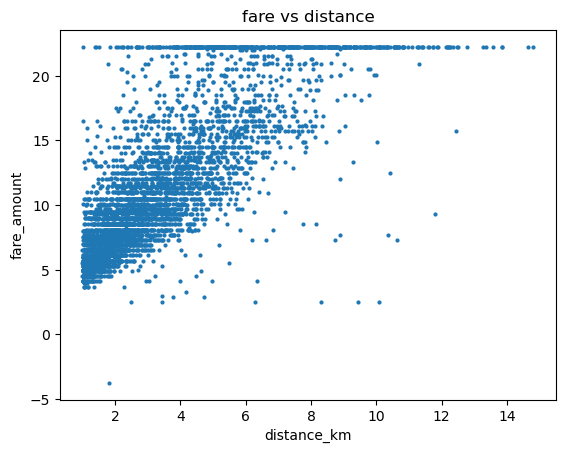

In [34]:
# scatter: fare vs distance (sample points for clarity)
sample = df.sample(5000, random_state=1)
plt.scatter(sample['dist_travel_km'], sample['fare_amount'], s=4)
plt.xlabel('distance_km'); plt.ylabel('fare_amount'); plt.title('fare vs distance'); plt.show()

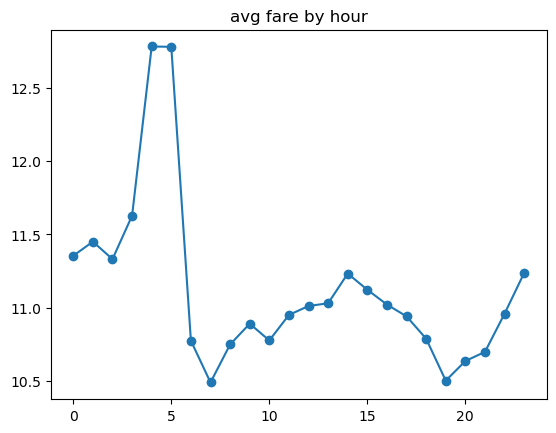

In [35]:
hourly = df.groupby('hour')['fare_amount'].mean()
plt.plot(hourly.index, hourly.values, marker='o'); plt.title('avg fare by hour'); plt.show()

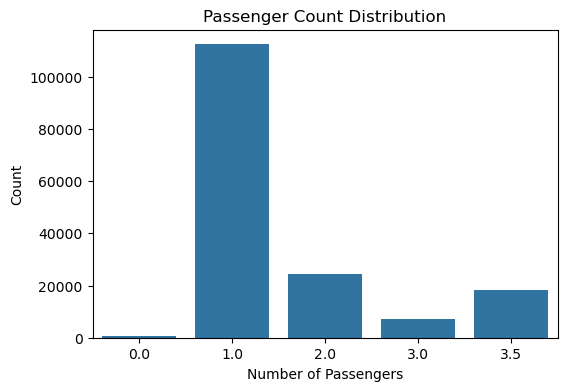

In [36]:
# 2️⃣ Passenger Count Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="passenger_count", data=df)
plt.title("Passenger Count Distribution")
plt.xlabel("Number of Passengers")
plt.ylabel("Count")
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
X=df[df.columns[1:]]
y = df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# 3. scaling for linear models
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
X_train_scaled =pd.DataFrame(X_train_scaled ,columns=X.columns)
X_train_scaled .head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,-0.731206,-0.403584,0.976367,1.216018,-0.590951,-1.294927,0.265445,0.205535,-1.481894,0.993969,1.159032
1,0.882671,1.142668,0.681911,0.205009,-0.590951,0.073302,1.532200,0.205535,0.133497,1.506381,-0.376904
2,-0.463174,-0.252705,-1.058307,-0.762254,-0.590951,0.833429,-1.692266,-1.251029,0.671961,0.481557,-0.603314
3,-0.619693,0.566581,-0.220935,0.775756,-0.590951,-0.990876,-1.116468,-1.542342,1.210424,-1.568091,-0.942497
4,-0.379871,0.195614,1.655636,2.438550,-0.590951,1.441530,1.186721,1.662100,0.671961,-0.030855,2.158875


In [40]:
X_test_scaled =pd.DataFrame(X_test_scaled ,columns=X.columns)
X_test_scaled .head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,-0.676371,0.281601,-0.714359,-0.492594,-0.590951,0.377352,0.380605,1.079474,-1.481894,-1.568091,-0.453302
1,-0.515856,-0.696532,-0.295124,0.156611,2.256801,0.681403,0.265445,-0.668404,1.748888,0.993969,-0.382087
2,-1.829090,-1.495719,-0.847125,-0.087925,-0.590951,-0.078724,0.956402,-1.542342,0.133497,-1.055679,0.384258
3,-0.054034,-0.785531,-0.492688,0.164747,-0.590951,0.073302,1.647359,1.662100,-1.481894,-0.543267,-0.251869
4,-0.296978,0.708331,-1.055855,-0.812177,2.256801,-1.903028,-0.540671,-0.085778,1.210424,-0.543267,0.599499


In [41]:
X_train_scaled .shape

(130432, 11)

In [42]:
X_test_scaled.shape

(32608, 11)

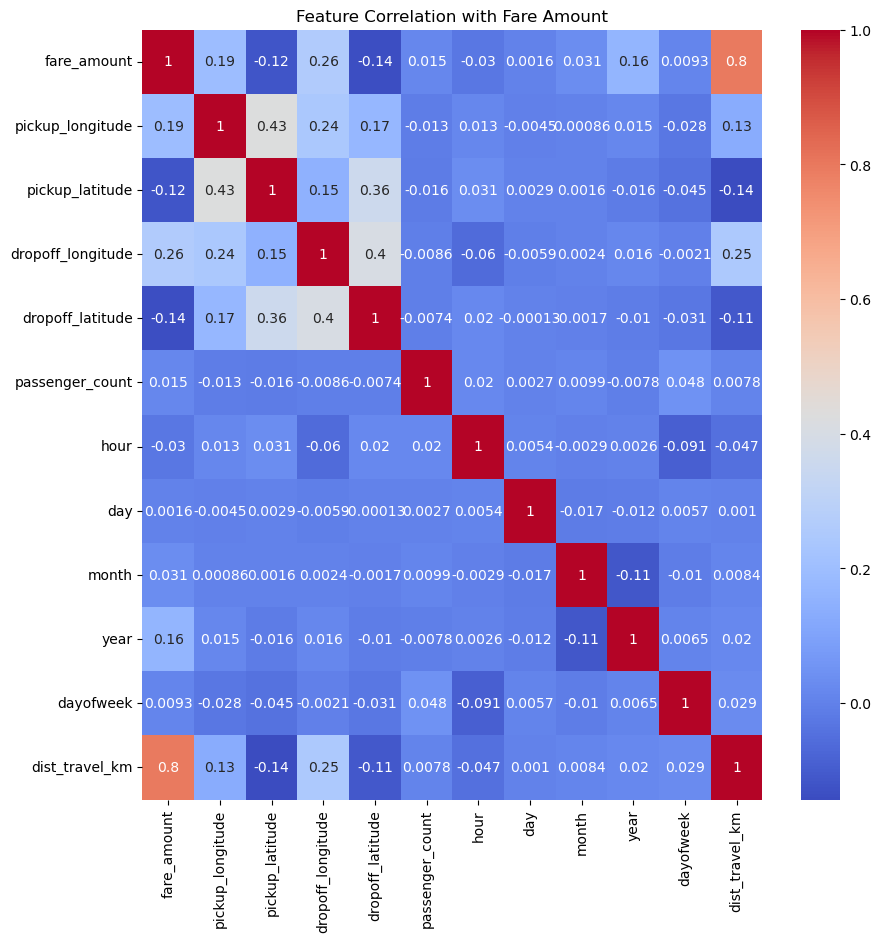

In [43]:
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Fare Amount")
plt.show()

## Train Models

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
dt_model = DecisionTreeRegressor(max_depth=5)
gb_model = GradientBoostingRegressor(random_state=42, learning_rate=0.1)
xgb_model = XGBRegressor(random_state=42, learning_rate=0.1)
    
 


In [45]:

# Train models
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## Step 2: Evaluate the Regression Model.

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [53]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'R2': r2_score(y_test, y_pred)
    }


In [54]:
lr_results = evaluate_model(lr_model, X_test_scaled, y_test)
rf_results = evaluate_model(rf_model, X_test_scaled, y_test)
dt_results=  evaluate_model(dt_model, X_test_scaled, y_test)
gb_results=  evaluate_model(gb_model, X_test_scaled, y_test)
xgb_reults=  evaluate_model(xgb_model, X_test_scaled, y_test)
print("Linear Regression:", lr_results)
print("Random Forest:", rf_results)
print("Decision Tree Regression:", dt_results)
print("Gradient Boosting Regression:", gb_results)
print("XGBoost Regression:", xgb_reults)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

Linear Regression: {'MAE': 2.126492182244676, 'RMSE': 3.054272418210655, 'R2': 0.6756829884943798}
Random Forest: {'MAE': 1.450314576177625, 'RMSE': 2.214464235121151, 'R2': 0.8295128973945919}
Decision Tree Regression: {'MAE': 1.8651517193074498, 'RMSE': 2.6695282046569657, 'R2': 0.7522445501612431}
Gradient Boosting Regression: {'MAE': 1.6219985055377135, 'RMSE': 2.3919280752151337, 'R2': 0.8010928376637823}
XGBoost Regression: {'MAE': 1.452867247189694, 'RMSE': 2.209215612603115, 'R2': 0.8303201012300314}


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [55]:
xgb_model2 = XGBRegressor(
    n_estimators=300,       # number of trees
    learning_rate=0.1,      # step size shrinkage
    max_depth=4,            # depth of each tree
    subsample=0.8,          # fraction of samples used per tree
    colsample_bytree=0.8,   # fraction of features per tree
    random_state=42
)

In [56]:
xgb_model2.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [59]:
ypred=xgb_model2.predict( X_test_scaled)

In [60]:
r2_score(y_test, ypred)

0.828921225446601

## Step 3: Fine-tuning the Model. on Random forest

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
rf_model = RandomForestRegressor(random_state=42)

In [69]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth':[10, 20, 30, None],
    'max_samples':[0.5, 0.7, 0.9, 1.0],
    'bootstrap':[True, False],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':  [1, 2, 4]
}
print(param_grid)

{'n_estimators': [100, 200, 300, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, None], 'max_samples': [0.5, 0.7, 0.9, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [74]:
rf_grid = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=10,            
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [75]:
rf_grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Lenovo\anaconda3\Lib\site-packa

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_samples': [0.5, 0.7, 0.9, 1.0],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, verbose=2)

In [76]:
print("Best Parameters:", rf_grid.best_params_)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_samples': 1.0, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [77]:
print("Best CV RMSE:", rf_grid.best_score_)



Best CV RMSE: 0.8344391559856333


In [96]:
best_model = rf_grid.best_estimator_

In [97]:
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

In [98]:
# ✅ Training performance
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)


In [99]:
# ✅ Testing performance
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [100]:
# 📊 Display results
print("----- Training Performance -----")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAE : {train_mae:.4f}")
print(f"R²  : {train_r2:.4f}")

print("\n----- Testing Performance -----")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE : {test_mae:.4f}")
print(f"R²  : {test_r2:.4f}")

----- Training Performance -----
RMSE: 1.1629
MAE : 0.7193
R²  : 0.9524

----- Testing Performance -----
RMSE: 2.1616
MAE : 1.4241
R²  : 0.8376


##  Interpret Feature Importance

In [61]:
importances = rf_model.feature_importances_
features = X_train_scaled.columns

# Create a DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [62]:
importance_df

,Feature,Importance
10,dist_travel_km,0.696819
0,pickup_longitude,0.068987
2,dropoff_longitude,0.065601
3,dropoff_latitude,0.037983
8,year,0.034129
1,pickup_latitude,0.030500
5,hour,0.022091
6,day,0.014989
7,month,0.013396
9,dayofweek,0.011087


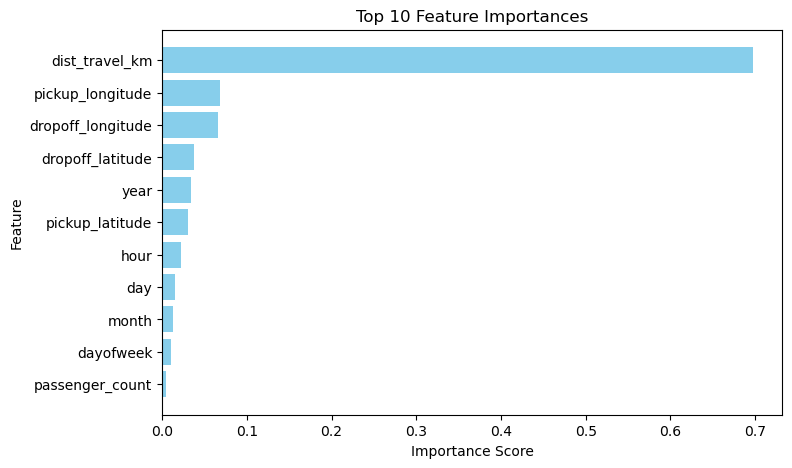

In [63]:
# 📊 Plot top 10 features
plt.figure(figsize=(8,5))
plt.barh(importance_df["Feature"][:11], importance_df["Importance"][:11], color="skyblue")
plt.gca().invert_yaxis()  # Highest on top
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [64]:
# Show full importance list
print(importance_df)

              Feature  Importance
10     dist_travel_km    0.696819
0    pickup_longitude    0.068987
2   dropoff_longitude    0.065601
3    dropoff_latitude    0.037983
8                year    0.034129
1     pickup_latitude    0.030500
5                hour    0.022091
6                 day    0.014989
7               month    0.013396
9           dayofweek    0.011087
4     passenger_count    0.004418


## Final Model

In [ ]:
## best_model is our final model

## Make prediction on new data

In [ ]:
# Example: user input (you can replace these values dynamically later)

In [156]:
user_input = {
      
    "pickup_longitude": -73.985,
    "pickup_latitude": 40.758,
    "dropoff_longitude": -73.985,
    "dropoff_latitude": 40.761,
    "passenger_count" :2, 
    "hour": 14,   
    "day":1,
    "month":6,
     "year":2025,
    "dayofweek": 3,
    "dist_travel_km": 10
   
    
}

In [157]:
# Convert to DataFrame
input_df = pd.DataFrame([user_input])

In [158]:
## scaled the user input 
input_df = scaler.transform(input_df )

In [159]:
## scaled data convert into Dataframe

In [160]:
input_df=pd.DataFrame (input_df,columns=X.columns)


In [166]:
input_df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,-0.285356,0.276872,-0.359877,0.345765,0.548149,0.073302,-1.692266,-0.085778,7.133523,-0.030855,3.048234


In [165]:
## predict fare 

best_model.predict(input_df)


array([21.20125291])